# Tarea 13. Bosque Aleatorio.

L.E. Rojón


138442

In [9]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from random import random,randint,seed,sample 
from sklearn.preprocessing import StandardScaler
import random as rn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn import tree
from sklearn.metrics import classification_report,confusion_matrix 

In [10]:
ab=pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data',delimiter=',')
ab.head()

,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [11]:
X=np.array(ab.iloc[:,1:9])
y=np.array(ab.iloc[:,0])
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=6)

scalerx = preprocessing.StandardScaler().fit(X_train)
X_train=scalerx.transform(X_train)
X_test=scalerx.transform(X_test)

arbol=DecisionTreeClassifier()
arbol.fit(X_train,y_train)
predar=arbol.predict(X_test) 
print(classification_report(y_test,predar))
print(confusion_matrix(y_test,predar))

             precision    recall  f1-score   support

          F       0.40      0.42      0.41       247
          I       0.59      0.62      0.61       271
          M       0.47      0.44      0.46       318

avg / total       0.49      0.49      0.49       836

[[103  39 105]
 [ 52 167  52]
 [103  75 140]]


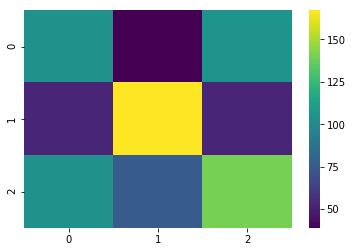

In [12]:
cm=confusion_matrix(y_test,predar)
sns.heatmap(cm,cmap='viridis')

In [13]:
RF=RandomForestClassifier(criterion='gini', min_samples_split=2,n_estimators=1000)
RF.fit(X_train,y_train) 
pred=RF.predict(X_test) 
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))


             precision    recall  f1-score   support

          F       0.41      0.37      0.39       247
          I       0.70      0.77      0.73       271
          M       0.49      0.48      0.48       318

avg / total       0.53      0.54      0.54       836

[[ 92  29 126]
 [ 29 208  34]
 [106  59 153]]


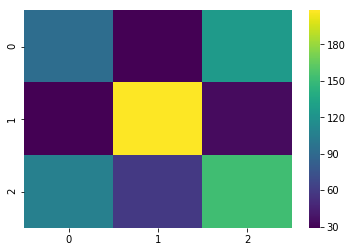

In [14]:
cm=confusion_matrix(y_test,pred)
sns.heatmap(cm,cmap='viridis')

De aquí es fácil ver que el algoritmo de Bosques aleatorios mejora todas las métricas con respecto al árbol original.
Veamos qué ocurre ahora con AdaBoost.

In [15]:
AB=AdaBoostClassifier()
AB.fit(X_train,y_train)
predab=AB.predict(X_test) 
print(classification_report(y_test,predab))
print(confusion_matrix(y_test,predab))

             precision    recall  f1-score   support

          F       0.47      0.28      0.35       247
          I       0.65      0.81      0.72       271
          M       0.48      0.53      0.51       318

avg / total       0.53      0.55      0.53       836

[[ 70  37 140]
 [ 10 220  41]
 [ 70  79 169]]


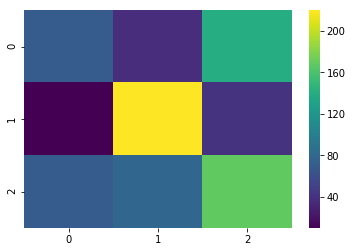

In [16]:
cm=confusion_matrix(y_test,predab)
sns.heatmap(cm,cmap='viridis')

AdaBoost mejora la precisión de F, pero empeora la de I y M. En general, aumenta el recall, pues lo disminuye para F pero lo aumenta para las otras dos categorías I y M. Por lo tanto, podemos concluir que el método AdaBoost es un poco más preciso el algoritmo de Bosques Aleatorios.